In [2]:
#importing the libraies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import joblib

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# this dataset contains :
- This dataset provides a comprehensive view of transactions, allowing for in-depth analysis of patterns, trends, and fraud detection.
trans_date_trans_time: The date and time of the transaction, stored as an object (likely in string format).

**cc_num**: The credit card number used for the transaction. Each number is unique to a customer.

**merchant**: The name of the merchant or business where the transaction occurred.

**category**: The category of the merchant, such as "groceries," "electronics," or "restaurants."

**amt**: The transaction amount in dollars.

**first**: The first name of the credit cardholder.

**last**: The last name of the credit cardholder.

**gender**: The gender of the credit cardholder.

**street**: The street address of the credit cardholder.

**city**: The city where the credit cardholder resides.

**state**: The state where the credit cardholder resides.

**zip**: The zip code of the credit cardholder's address.

**lat**: The latitude coordinate of the credit cardholder's address.

**long**: The longitude coordinate of the credit cardholder's address.

**city_pop**: The population of the city where the credit cardholder resides.

**job**: The occupation of the credit cardholder.

**dob**: The date of birth of the credit cardholder.

**trans_num**: A unique identifier for each transaction.

**unix_time**: The timestamp of the transaction in UNIX time format (seconds since January 1, 1970).

**merch_lat**: The latitude coordinate of the merchant's location.

**merch_long**: The longitude coordinate of the merchant's location.

**is_fraud**: A binary column indicating whether the transaction is fraudulent (1) or legitimate (0).

In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True,axis=1)

In [6]:
rows, cols = df.shape
print(f"The dataset contains {rows} rows and {cols} columns.")

The dataset contains 1852394 rows and 22 columns.


In [7]:
# get information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [8]:
# kowing the description 
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


# Data Cleaning

In [9]:
df.drop(columns=['first', 'last', 'street', 'dob', 'trans_num','job','unix_time'],inplace=True,axis=1)
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,Luray,MO,63453,40.4931,-91.8912,519,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,TX,77566,29.0393,-95.4401,28739,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,WA,99323,46.1966,-118.9017,3684,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,Mesa,ID,83643,44.6255,-116.4493,129,44.470525,-117.080888,0


In [10]:
#check the columns data types 
df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
gender                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [11]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [12]:
df['is_fraud'] = df['is_fraud'].astype(bool)

In [13]:
# recheck the data types 
df.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
gender                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
merch_lat                       float64
merch_long                      float64
is_fraud                           bool
dtype: object

```
This code creates a summary DataFrame (info) that provides key insights about the dataset, including:
IsNa: The number of missing (NaN) values in each column.
Duplicate: The total number of duplicate rows in the dataset.
Unique: The number of unique values in each column.
```


In [14]:
# check for missing values 
info = pd.DataFrame(df.isna().sum(), columns=["IsNa"])
info.insert(1, "Duplicate", df.duplicated().sum(), True)
info.insert(2, "Unique", df.nunique(),True)
info.T

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
IsNa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Duplicate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Unique,1819551,999,693,14,60616,2,906,51,985,983,983,891,1754157,1809753,2


In [15]:
df.rename(columns={
    'cc_num': 'Credit_card_number',
    'merchant': 'Merchant_name',
    'category': 'Merchant_category',
    'amt': 'Transaction_amount',
    'gender': 'Gender',
    'lat': 'Customer_latitude',
    'long': 'Customer_longitude',
    'city_pop': 'Customer_city_population',
    'merch_lat': 'Merchant_latitude',
    'merch_long': 'Merchant_longitude',
    'is_fraud': 'Is_fraud',
}, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 15 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   trans_date_trans_time     datetime64[ns]
 1   Credit_card_number        int64         
 2   Merchant_name             object        
 3   Merchant_category         object        
 4   Transaction_amount        float64       
 5   Gender                    object        
 6   city                      object        
 7   state                     object        
 8   zip                       int64         
 9   Customer_latitude         float64       
 10  Customer_longitude        float64       
 11  Customer_city_population  int64         
 12  Merchant_latitude         float64       
 13  Merchant_longitude        float64       
 14  Is_fraud                  bool          
dtypes: bool(1), datetime64[ns](1), float64(5), int64(3), object(5)
memory usage: 199.6+ MB


## .Exploratory Data Analysis¶


In [17]:
# Count the occurrences of unique values in the 'is_fraud' column
fraud_uniqe= df['Is_fraud'].value_counts()
fraud_uniqe

Is_fraud
False    1842743
True        9651
Name: count, dtype: int64

this code generates a bar plot using Seaborn to visualize the distribution of fraud (1) vs. non-fraud (0) transactions in the dataset. 

It helps to identify class imbalance, which is crucial in fraud detection models

# 💡 Why is this useful?

```
Helps identify class imbalance (which can affect model performance)
Provides a quick overview of fraud occurrences in the dataset.
Useful for deciding whether to balance the dataset
```

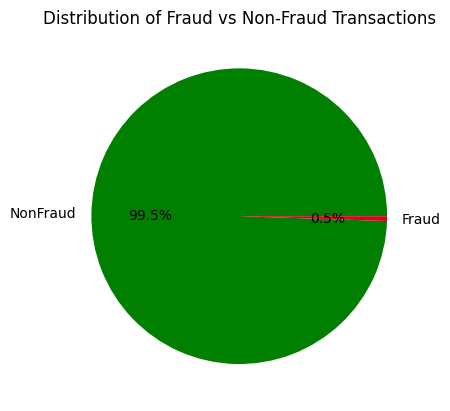

In [18]:
#Illustrate the proportion of fraudulent transactions compared to legitimate ones
colors =['#017f01','#d8031c']
labels = ['NonFraud','Fraud',]
plt.pie(df['Is_fraud'].value_counts(), labels=labels,colors=colors ,autopct='%1.1f%%')
plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.show()

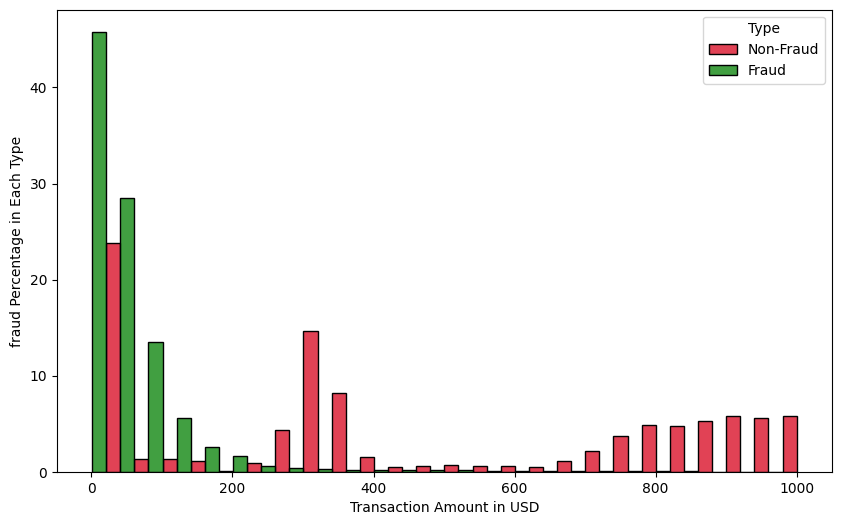

In [19]:
#amount vs fraud
colors =['#017f01','#d8031c']
plt.figure(figsize=(10,6))
ax=sns.histplot(x='Transaction_amount',data=df[df.Transaction_amount<=1000],hue='Is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25,palette=colors)
ax.set_ylabel('fraud Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Non-Fraud', 'Fraud'])

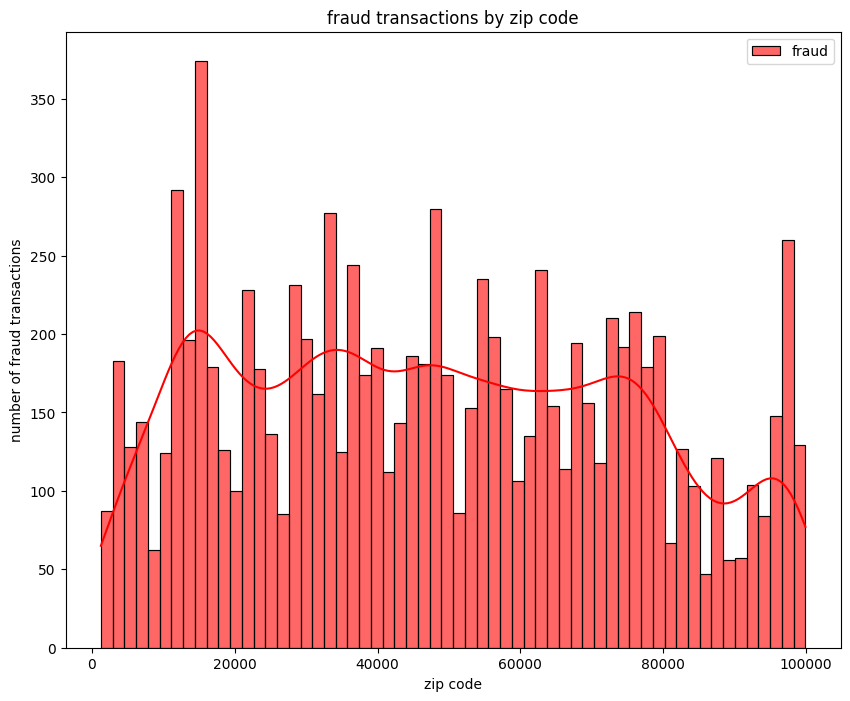

In [20]:
#fraud by zip code
plt.figure(figsize=(10,8))
sns.histplot(df[df['Is_fraud']==1],x="zip",bins=60,kde=True, color="red",label="fraud", alpha=0.6)
plt.xlabel('zip code')
plt.legend()
plt.ylabel('number of fraud transactions')
plt.title('fraud transactions by zip code')
plt.show()

In [21]:
print('category contains', len(df['Merchant_category'].unique()), 'labels')       
df.Merchant_category.value_counts()

category contains 14 labels


Merchant_category
gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: count, dtype: int64

In [22]:
# This code snippet calculates the number of fraudulent transactions for each category in the dataset.
fraud_countsby_category= df[df['Is_fraud'] == 1].groupby('Merchant_category')['Is_fraud'].count()
fraud_countsby_category

Merchant_category
entertainment      292
food_dining        205
gas_transport      772
grocery_net        175
grocery_pos       2228
health_fitness     185
home               265
kids_pets          304
misc_net          1182
misc_pos           322
personal_care      290
shopping_net      2219
shopping_pos      1056
travel             156
Name: Is_fraud, dtype: int64

### code visualize the number of fraudulent transactions per merchant category using a bar plot.


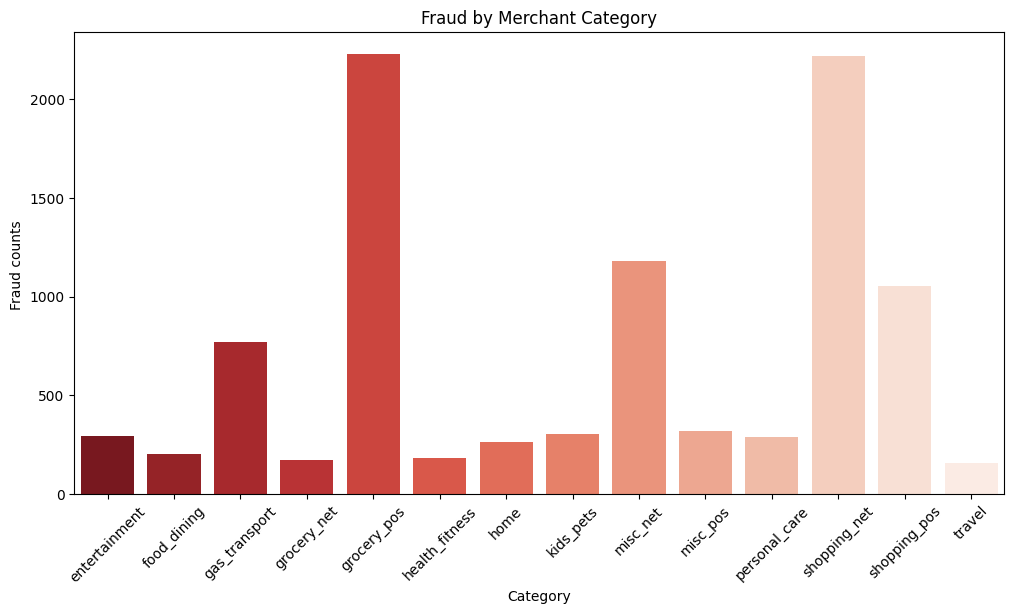

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_countsby_category.index, y=fraud_countsby_category.values,hue=fraud_countsby_category.index, palette="Reds_r")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Fraud counts ")
plt.title("Fraud by Merchant Category")
plt.show()

In [24]:
#this function is used to category the city population into small, medium, and large
def categorybynum(pop):
    if pop < 50000:
        return "Small"
    elif pop < 500000:
        return "Medium"
    else:
        return "Large"
df['city_size'] = df['Customer_city_population'].apply(categorybynum)

In [25]:
# USING CITY SIZE TO KNOW THE NUMBER OF FRAUDULENT TRANSACTIONS IN EACH CITY SIZE
fraud_counts_by_city=df.groupby('city_size')['Is_fraud'].count()
fraud_counts_by_city

city_size
Large       93737
Medium     252454
Small     1506203
Name: Is_fraud, dtype: int64

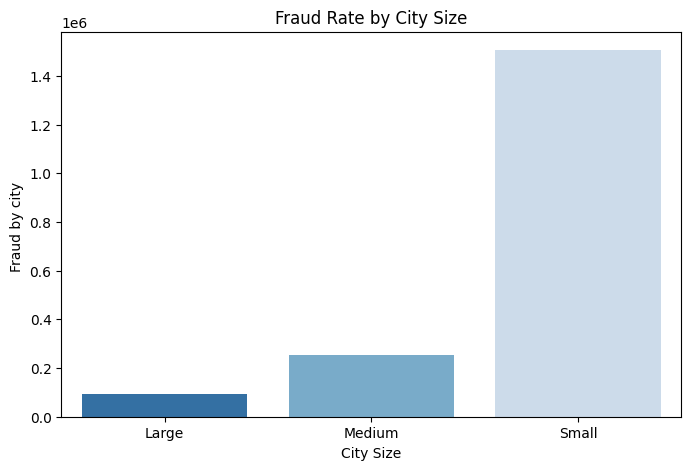

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(x=fraud_counts_by_city.index, y=fraud_counts_by_city.values,hue=fraud_counts_by_city.index, palette="Blues_r")
plt.xlabel("City Size")
plt.ylabel("Fraud by city ")
plt.title("Fraud Rate by City Size")
plt.show()

In [27]:
df['Is_fraud'].value_counts()

Is_fraud
False    1842743
True        9651
Name: count, dtype: int64

In [28]:
df.shape

(1852394, 16)

In [29]:
df['trans_date_trans_time'] = df['trans_date_trans_time'].astype(int) // 10**9  # Convert to Unix timestamp

In [30]:
df.drop(columns=['Merchant_name'], inplace=True)

In [31]:
le_gender = LabelEncoder()
le_city_size = LabelEncoder()
le_merchant_category = LabelEncoder()
le_city = LabelEncoder()
le_state = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['city_size'] = le_city_size.fit_transform(df['city_size'])
df['Merchant_category'] = le_merchant_category.fit_transform(df['Merchant_category'])
df['city'] = le_city.fit_transform(df['city'])
df['state'] = le_state.fit_transform(df['state'])


In [32]:
df['Is_fraud'] = df['Is_fraud'].astype(int)  

In [33]:
print(df.dtypes)

trans_date_trans_time         int64
Credit_card_number            int64
Merchant_category             int64
Transaction_amount          float64
Gender                        int64
city                          int64
state                         int64
zip                           int64
Customer_latitude           float64
Customer_longitude          float64
Customer_city_population      int64
Merchant_latitude           float64
Merchant_longitude          float64
Is_fraud                      int64
city_size                     int64
dtype: object


In [34]:
X = df.drop(columns=['Is_fraud'])  
y = df['Is_fraud']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
def plot_pca(X_resampled, y_resampled, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_resampled)
    
    plt.figure(figsize=(5,5))
    y_resampled = y_resampled.astype(str)

    sns.scatterplot(
        x=X_pca[:, 0], 
        y=X_pca[:, 1], 
        hue=y_resampled, 
        palette={"0": "blue", "1": "red"}, 
        alpha=0.6, 
        edgecolor="black"
    )
    
    plt.title(title)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    
    handles, labels = plt.gca().get_legend_handles_labels()
    labels = ["Class 0", "Class 1"]
    plt.legend(handles, labels, title="Class", loc="upper right")

    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

In [36]:
# samplers = {
#     "SMOTE": SMOTE(random_state=42),
#     "ADASYN": ADASYN(random_state=42),
#     "RandomOverSampler": RandomOverSampler(random_state=42),
#     "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
#     "SVMSMOTE": SVMSMOTE(random_state=42),
#     "SMOTETomek": SMOTETomek(random_state=42),
#     "SMOTEENN": SMOTEENN(random_state=42)
# }

# for name, sampler in samplers.items():
#     X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
#     plot_pca(X_resampled, y_resampled, title=f"{name} PCA")

In [37]:
#plot_pca(X, y, title="data PCA")

In [38]:
smote_enn = SMOTEENN(sampling_strategy=0.39,random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)
print("Before resampling:", Counter(y_train))
print("After resampling:", Counter(y_train_resampled))

Before resampling: Counter({0: 1474194, 1: 7721})
After resampling: Counter({0: 1471926, 1: 574593})


In [39]:
df_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)
df_resampled.head()


,trans_date_trans_time,Credit_card_number,Merchant_category,Transaction_amount,Gender,city,state,zip,Customer_latitude,Customer_longitude,Customer_city_population,Merchant_latitude,Merchant_longitude,city_size,Is_fraud
0,1607960765,2296006538441789,7,75.72,0,102,34,11217,40.6816,-73.9798,2504700,40.443492,-73.439422,0,0
1,1549362360,6011393492413821,2,79.74,0,463,4,90014,34.0443,-118.2509,2383912,33.672410,-117.663817,0,0
2,1584391541,3534330126107879,6,74.92,1,95,26,59014,45.2857,-108.9082,1446,45.469725,-109.723735,2,0
3,1604104937,4587657402165341696,2,44.30,0,645,14,60958,41.0646,-87.5917,2135,40.528089,-87.904092,2,0
4,1601750839,4990494243023,6,28.02,1,174,20,21524,39.6967,-78.8031,626,39.564020,-79.624007,2,0


In [40]:
print(df_resampled.shape)

(2046519, 15)


In [41]:
df_resampled['Gender'] = le_gender.inverse_transform(df_resampled['Gender'])
df_resampled['Merchant_category'] = le_merchant_category.inverse_transform(df_resampled['Merchant_category'])
df_resampled['state'] = le_state.inverse_transform(df_resampled['state'])
df_resampled['city_size'] = le_city_size.inverse_transform(df_resampled['city_size'])
df_resampled['city'] = le_city.inverse_transform(df_resampled['city'])

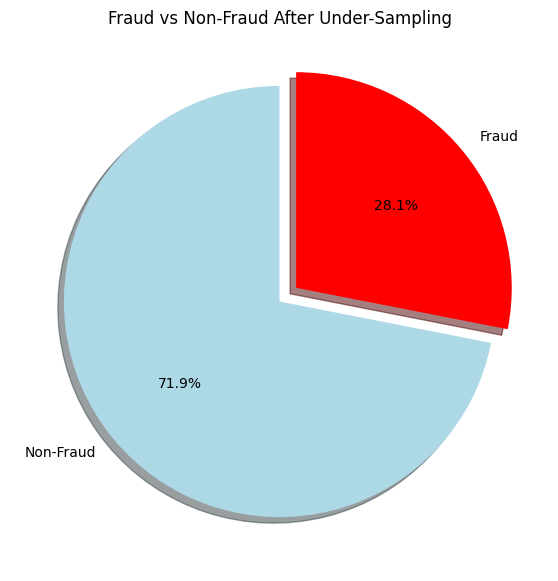

In [42]:
fraud_counts = df_resampled['Is_fraud'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(fraud_counts, labels=["Non-Fraud", "Fraud"], autopct="%1.1f%%", colors=["lightblue", "red"], startangle=90,explode=[0,0.1],shadow=True )
plt.title("Fraud vs Non-Fraud After Under-Sampling")
plt.show()

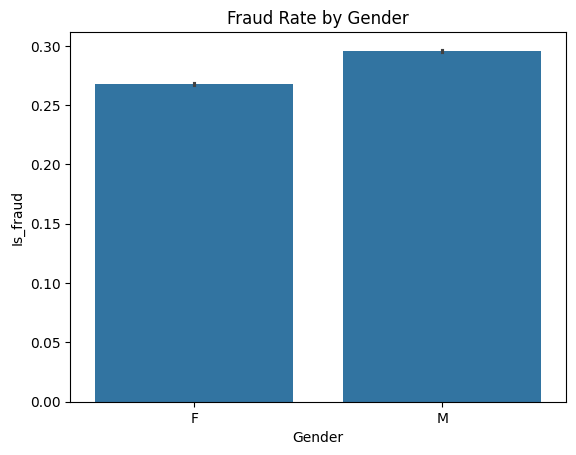

In [43]:
#Check if fraud rates differ by gender.
sns.barplot(data=df_resampled, x='Gender', y='Is_fraud')
plt.title('Fraud Rate by Gender')
plt.show()

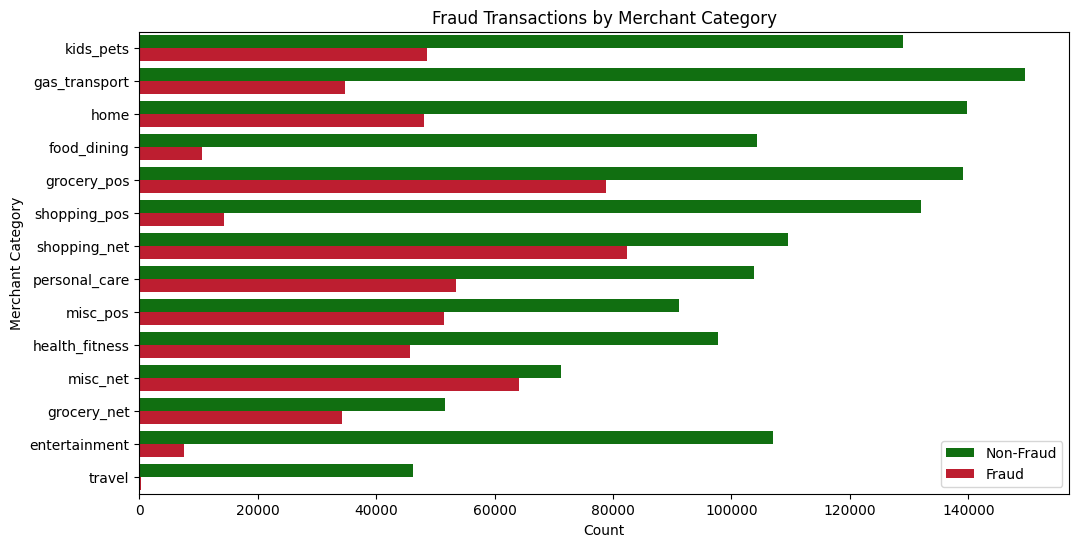

In [44]:
# which merchant categories are more prone to fraud.
plt.figure(figsize=(12, 6))
sns.countplot(data=df_resampled, y='Merchant_category', hue='Is_fraud', palette=['#017f01', '#d8031c'])
plt.title('Fraud Transactions by Merchant Category')
plt.xlabel('Count')
plt.ylabel('Merchant Category')
plt.legend(labels=['Non-Fraud', 'Fraud'])
plt.show()

In [45]:
# Filter fraud transactions
fraud_df = df_resampled[df_resampled["Is_fraud"] == 1]

# Count fraud transactions per state
fraud_by_state = fraud_df["state"].value_counts().reset_index()
fraud_by_state.columns = ["state", "fraud_count"]

fig = px.choropleth(
    fraud_by_state,
    locations="state",
    locationmode="USA-states",
    color="fraud_count",
    color_continuous_scale="Viridis",
    scope="north america",
    title="Fraud Transactions by State"
)
fig.show()


In [46]:
# Aggregate fraud cases per city with lat/lon
fraud_by_city = fraud_df.groupby(["city", "Customer_latitude", "Customer_longitude"]).size().reset_index(name="fraud_count")

# Create a street-level scatter plot
fig = px.scatter_mapbox(
    fraud_by_city,
    lat="Customer_latitude",
    lon="Customer_longitude",
    text="city",  # Display city names
    size="fraud_count",  # Bubble size based on fraud count
    color="fraud_count",  # Color based on fraud count
    color_continuous_scale="Inferno",
    hover_name="city",
    zoom=4,  # Adjust zoom level
    mapbox_style="open-street-map",  # Use a street-style map
    title="Fraud Transactions by City"
)

# Show the map
fig.show()


C:\Users\hawki\AppData\Local\Temp\ipykernel_13036\2290048004.py:5: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [47]:
fraud_by_city = fraud_df.groupby(["city", "Customer_latitude", "Customer_longitude", "Customer_city_population"]).size().reset_index(name="fraud_count")

# Drop missing values
fraud_by_city = fraud_by_city.dropna(subset=["Customer_latitude", "Customer_longitude", "Customer_city_population"])

# Create scatter map with bubble size based on city population
fig = px.scatter_mapbox(
    fraud_by_city,
    lat="Customer_latitude",
    lon="Customer_longitude",
    text="city",
    size="Customer_city_population",  # Bubble size represents population
    color="fraud_count",  # Fraud count is shown by color
    color_continuous_scale="Plasma",
    hover_name="city",
    hover_data={"fraud_count": True, "Customer_city_population": True},
    zoom=4,
    mapbox_style="carto-positron",
    title="Fraud Transactions vs. City Population"
)

fig.show()

C:\Users\hawki\AppData\Local\Temp\ipykernel_13036\1006055703.py:7: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [48]:
print(df.shape,df_resampled.shape)


(1852394, 15) (2046519, 15)


# Data Preprocessing

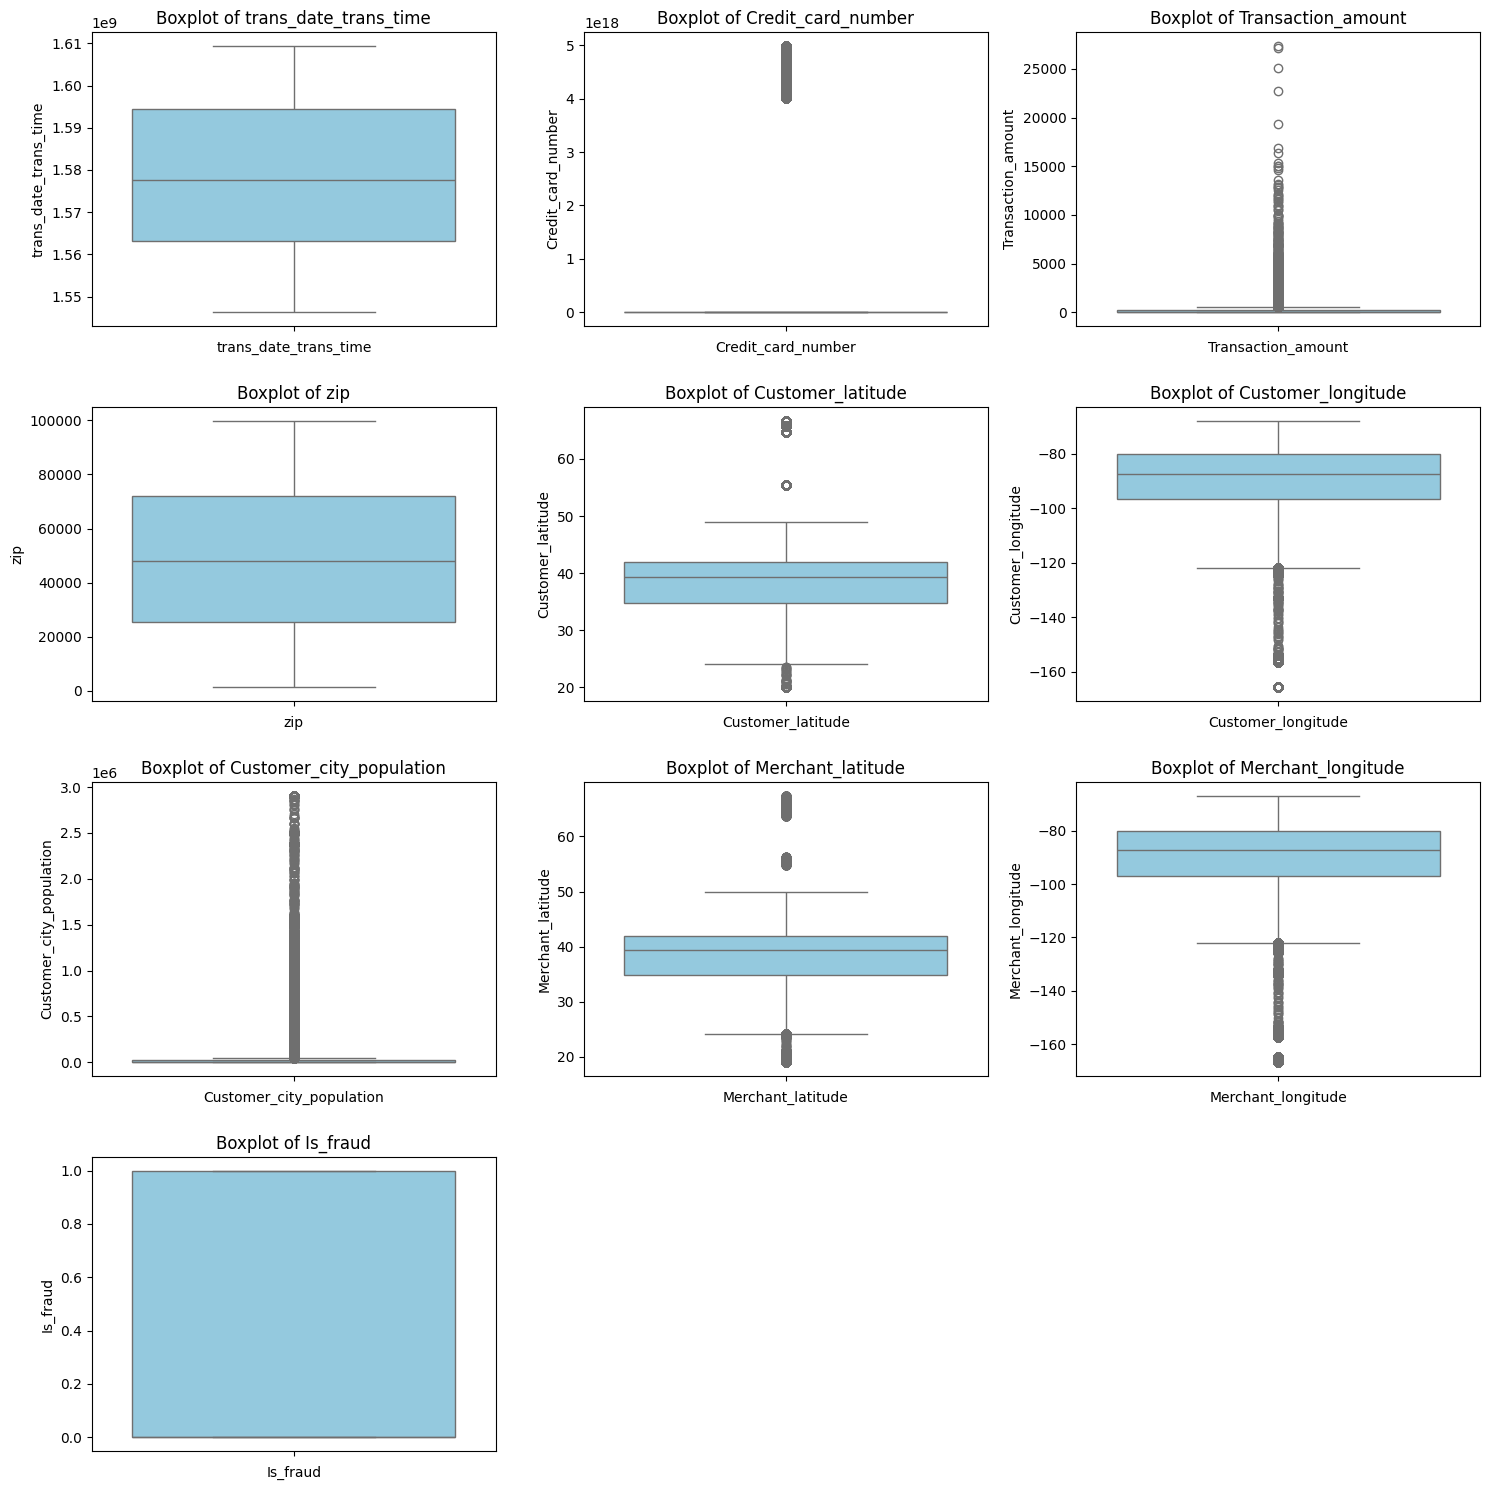

In [49]:
# making box plot to discover the outliers 
numeric_columns = df_resampled.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(len(numeric_columns) // 3 + 1, 3, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=df_resampled[column], ax=axes[i], color='skyblue') 
    axes[i].set_title(f'Boxplot of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)

    # Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [50]:
# remove outliers using IQR method
columns_to_clean = [
    'Transaction_amount',
    'Customer_city_population',
]

# Loop through each column and apply the IQR method
for col in columns_to_clean:
    Q1 = df_resampled[col].quantile(0.25)  # 25th percentile
    Q3 = df_resampled[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataframe to keep rows within the bounds
    df_resampled = df_resampled[(df_resampled[col] >= lower_bound) | (df_resampled[col] <= upper_bound)]

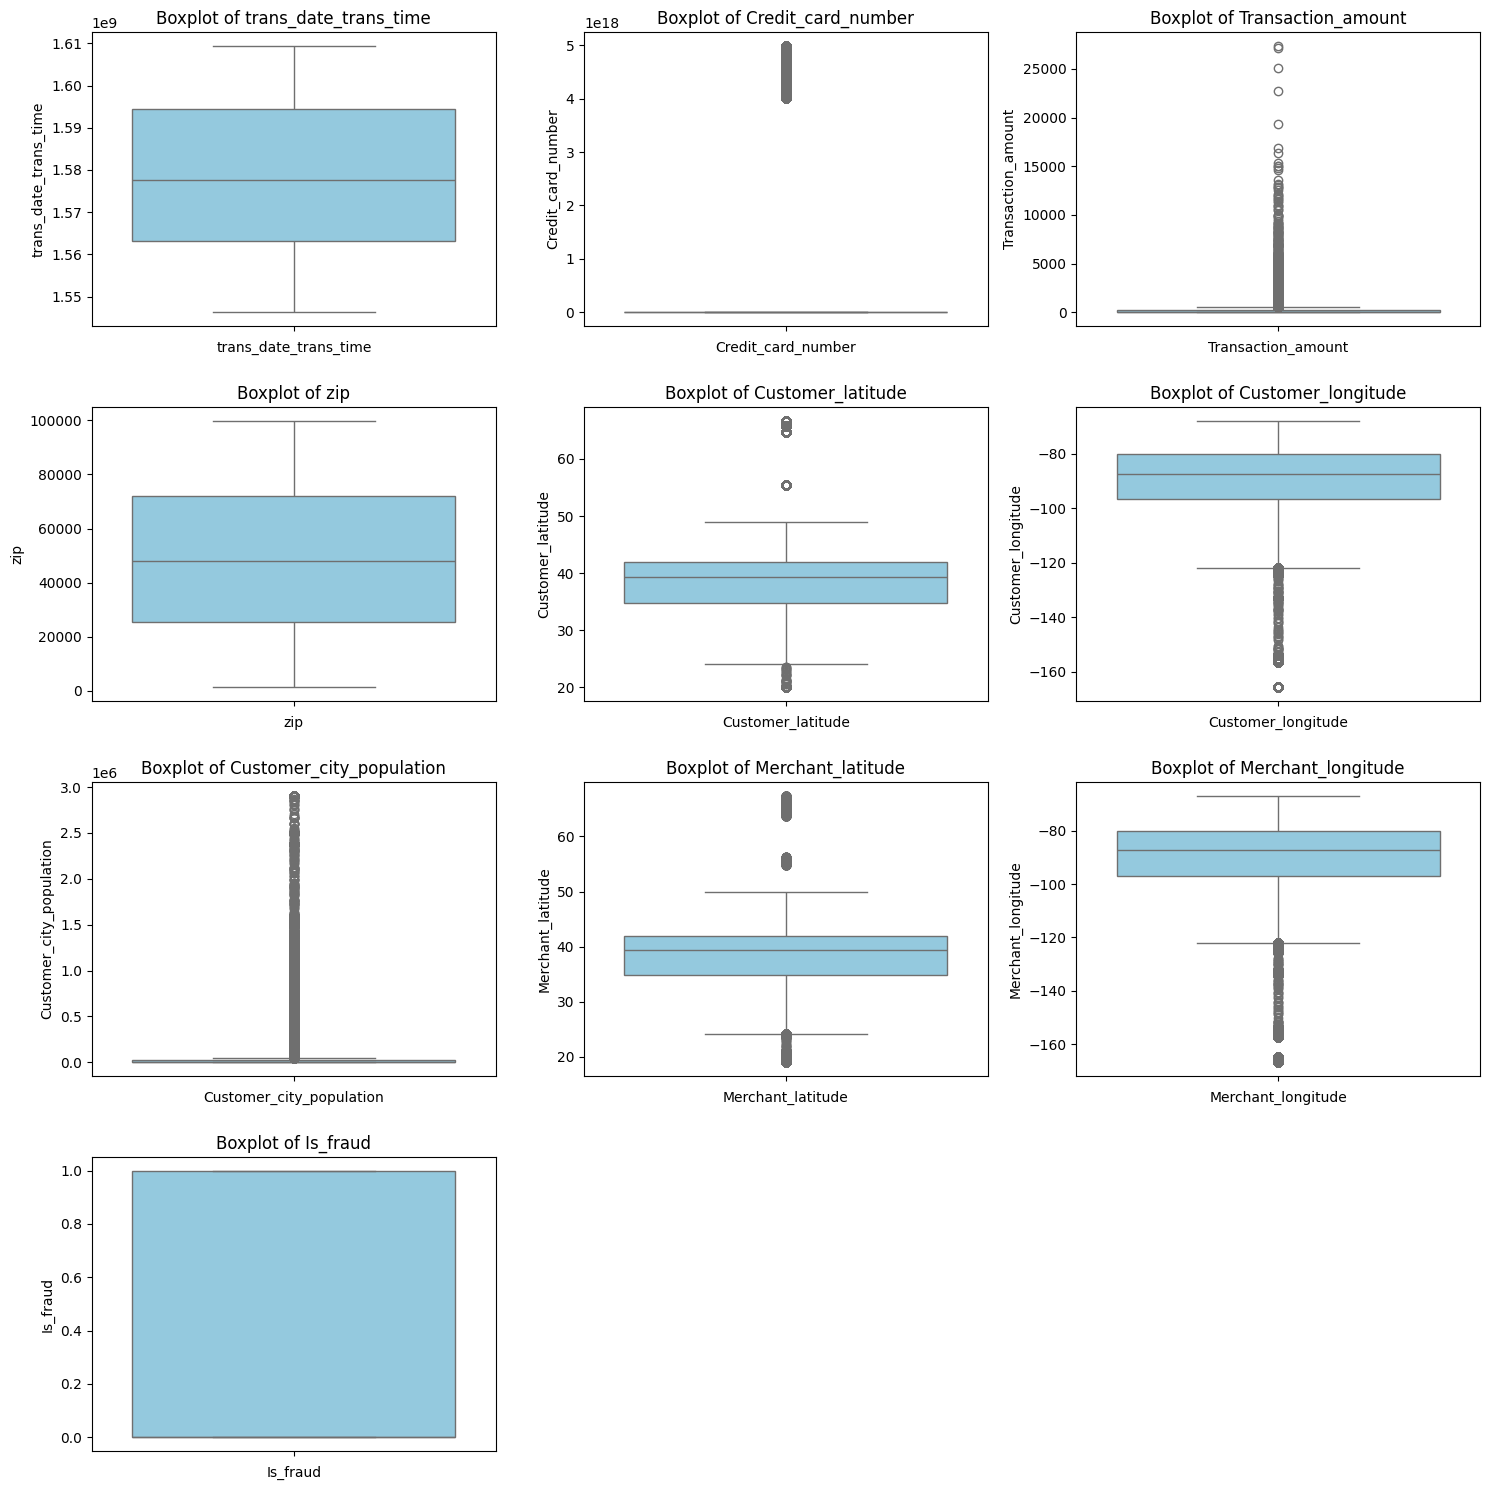

In [51]:
numeric_columns = df_resampled.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(len(numeric_columns) // 3 + 1, 3, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=df_resampled[column], ax=axes[i], color='skyblue') 
    axes[i].set_title(f'Boxplot of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)

    # Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

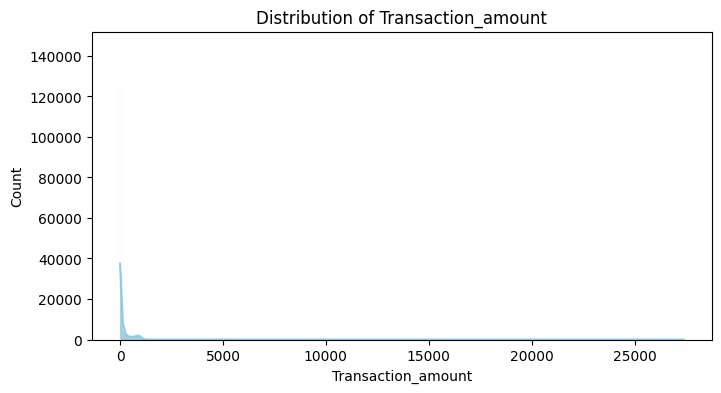

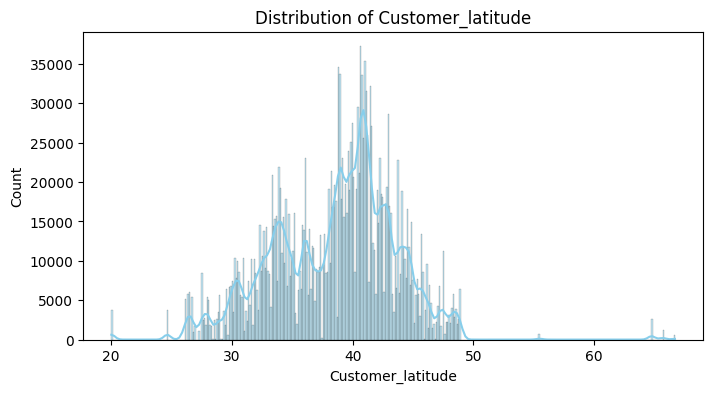

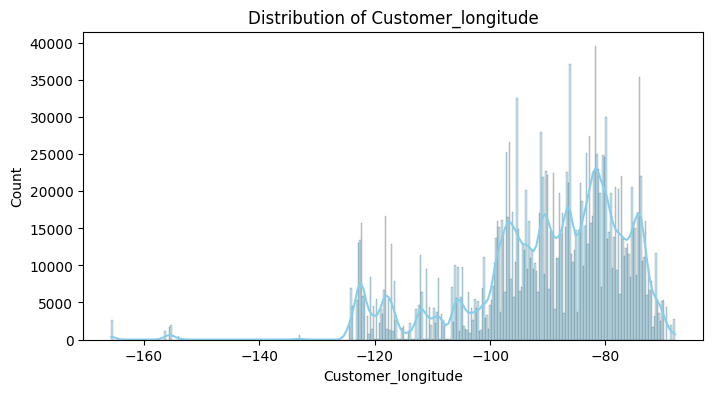

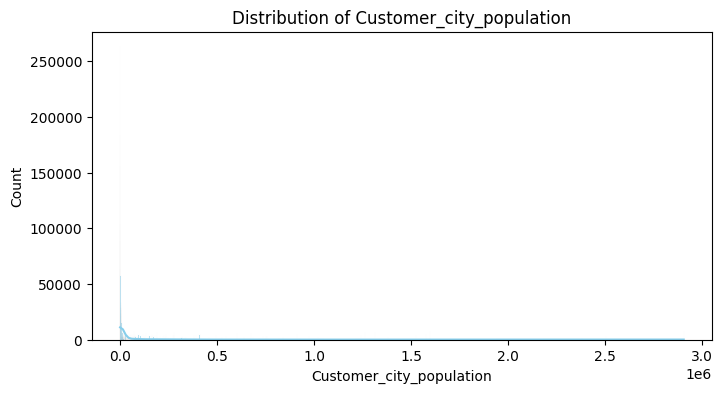

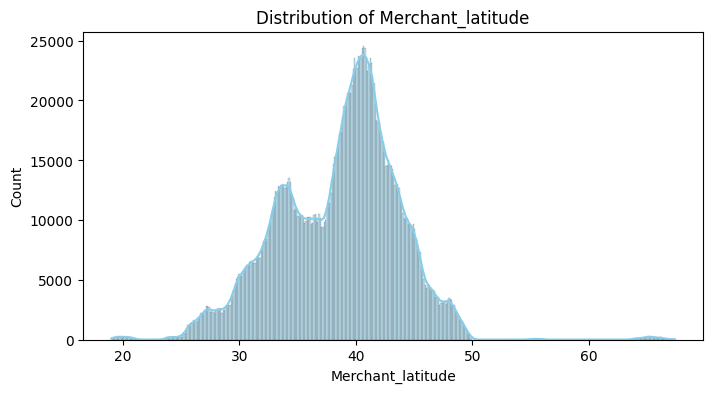

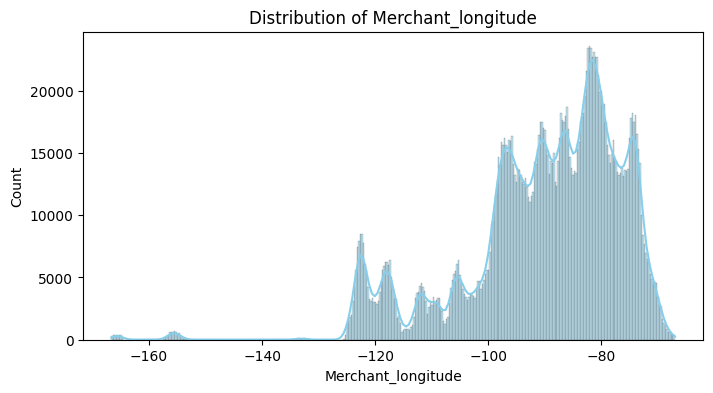

In [52]:
numeric_cols = [
    'Transaction_amount',
    'Customer_latitude',
    'Customer_longitude',
    'Customer_city_population',
    'Merchant_latitude',
    'Merchant_longitude'
]

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_resampled[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()

In [53]:
# Initialize the scalers
minmax_scaler = MinMaxScaler()

columns_minmax = ['Transaction_amount', 'Customer_city_population']

df_resampled[columns_minmax] = minmax_scaler.fit_transform(df_resampled[columns_minmax])


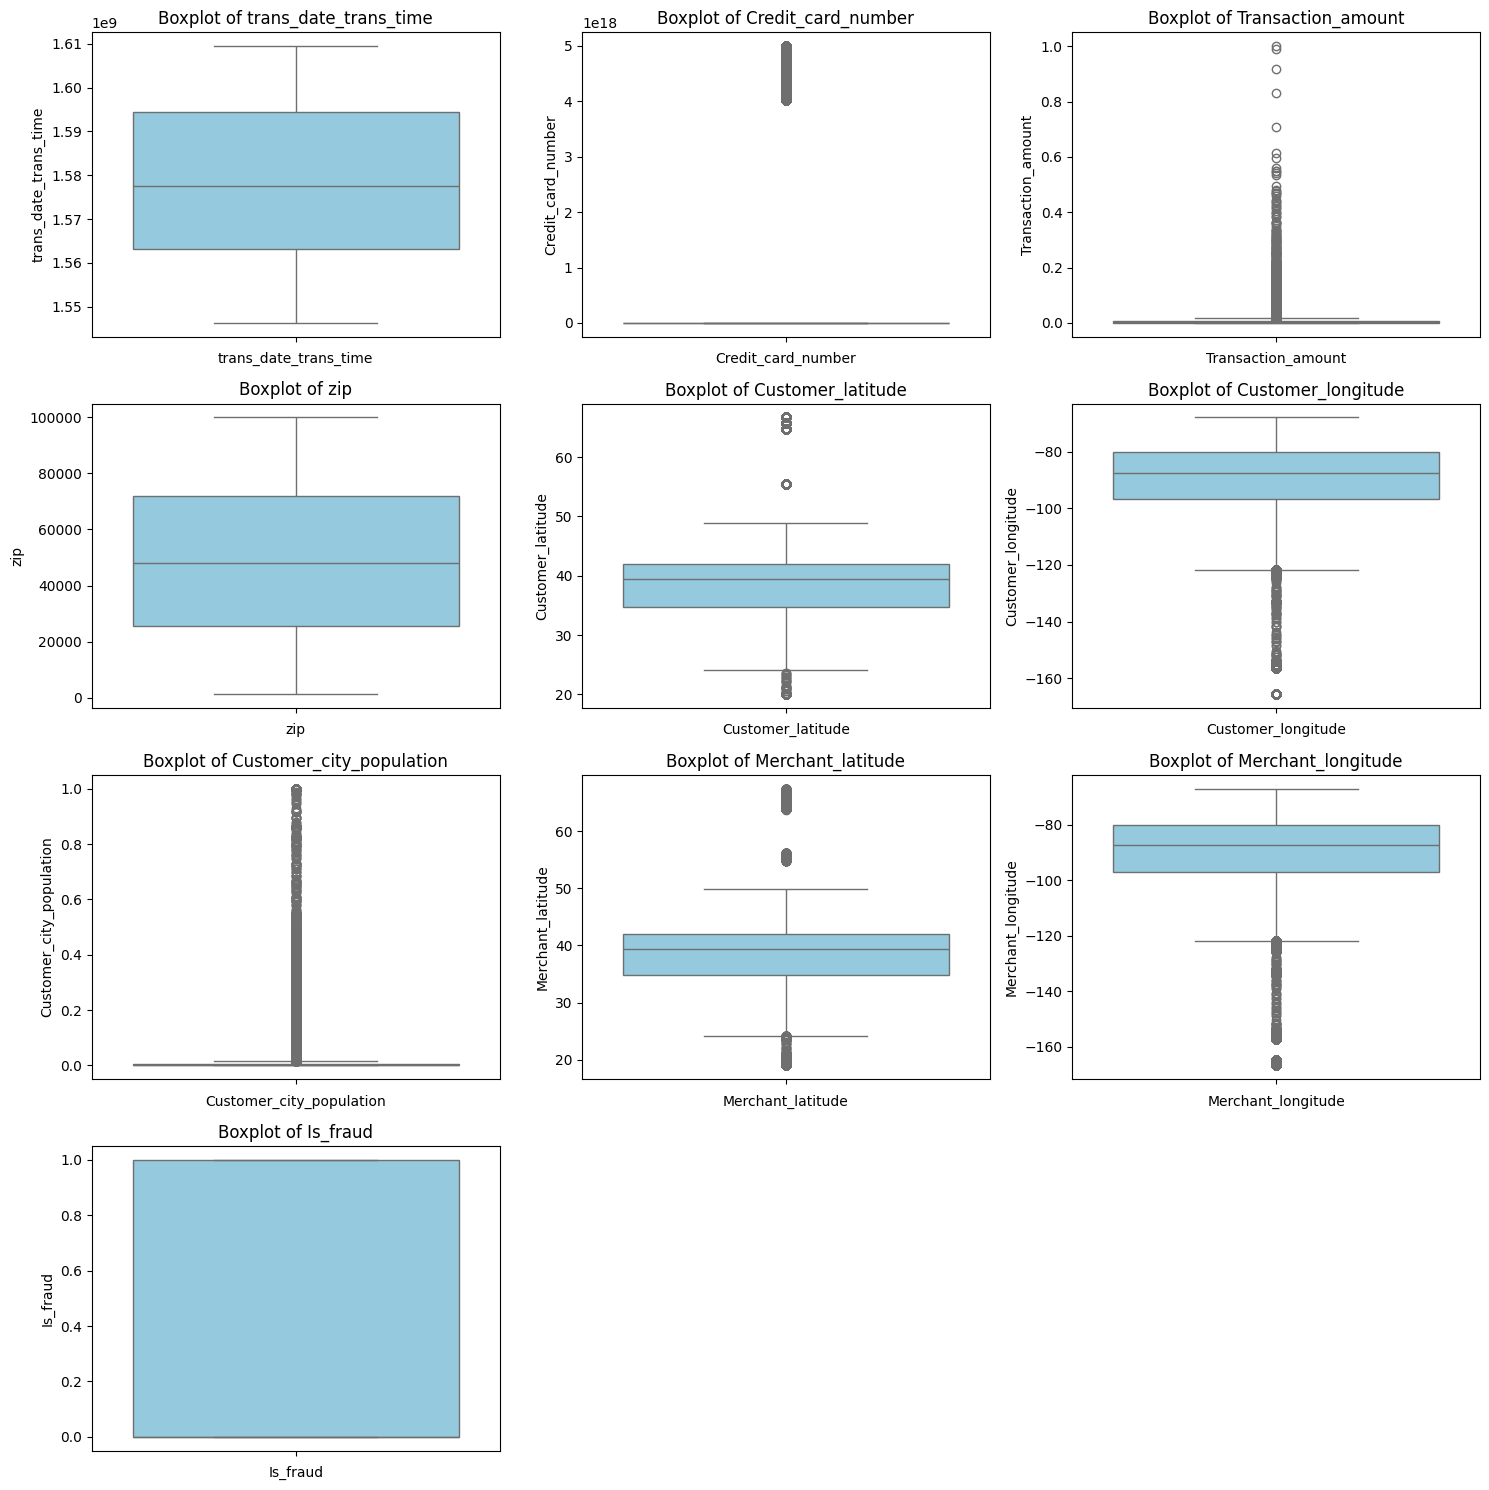

In [54]:
numeric_columns = df_resampled.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(len(numeric_columns) // 3 + 1, 3, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=df_resampled[column], ax=axes[i], color='skyblue') 
    axes[i].set_title(f'Boxplot of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)

    # Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 15 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   trans_date_trans_time     int64  
 1   Credit_card_number        int64  
 2   Merchant_category         int64  
 3   Transaction_amount        float64
 4   Gender                    int64  
 5   city                      int64  
 6   state                     int64  
 7   zip                       int64  
 8   Customer_latitude         float64
 9   Customer_longitude        float64
 10  Customer_city_population  int64  
 11  Merchant_latitude         float64
 12  Merchant_longitude        float64
 13  Is_fraud                  int64  
 14  city_size                 int64  
dtypes: float64(5), int64(10)
memory usage: 212.0 MB


In [56]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046519 entries, 0 to 2046518
Data columns (total 15 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   trans_date_trans_time     int64  
 1   Credit_card_number        int64  
 2   Merchant_category         object 
 3   Transaction_amount        float64
 4   Gender                    object 
 5   city                      object 
 6   state                     object 
 7   zip                       int64  
 8   Customer_latitude         float64
 9   Customer_longitude        float64
 10  Customer_city_population  float64
 11  Merchant_latitude         float64
 12  Merchant_longitude        float64
 13  city_size                 object 
 14  Is_fraud                  int64  
dtypes: float64(6), int64(4), object(5)
memory usage: 234.2+ MB


In [57]:
tested_data = pd.concat([X_test, y_test], axis=1)

In [58]:
tested_data

,trans_date_trans_time,Credit_card_number,Merchant_category,Transaction_amount,Gender,city,state,zip,Customer_latitude,Customer_longitude,Customer_city_population,Merchant_latitude,Merchant_longitude,city_size,Is_fraud
650397,1570185112,213186334552049,4,102.34,0,380,38,16329,41.8117,-79.2643,528,42.377432,-78.320823,2,0
1123020,1586727296,373905417449658,6,27.03,0,507,43,76665,31.9290,-97.6443,2526,32.822783,-97.422179,2,0
1775339,1607977112,4277232699798846,5,115.22,0,694,28,58651,46.1664,-103.7079,475,45.595840,-104.132965,2,0
806430,1575596393,2512312531485080,0,6.54,1,848,22,48088,42.5164,-82.9832,134056,43.276110,-83.701895,1,0
1176795,1588718611,4736845434667908128,6,28.03,0,15,34,12910,44.8816,-73.6408,2148,44.036799,-74.245102,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774714,1607969966,4003989662068504,1,16.22,1,68,1,35022,33.3224,-86.9657,71463,33.650374,-86.315181,1,0
974262,1580340459,30153452207526,5,3.29,0,163,43,76834,31.8287,-99.4270,5908,31.469371,-100.401813,2,0
1721287,1606935770,38295635583927,1,230.70,0,600,43,79539,33.3749,-99.8473,178,34.299960,-100.124635,2,0
571597,1567242611,4642894980163,3,41.61,1,146,12,51632,40.7491,-95.0380,7297,39.838759,-95.032974,2,0


In [59]:
tested_data['Gender'] = le_gender.inverse_transform(tested_data['Gender'])
tested_data['Merchant_category'] = le_merchant_category.inverse_transform(tested_data['Merchant_category'])
tested_data['state'] = le_state.inverse_transform(tested_data['state'])
tested_data['city_size'] = le_city_size.inverse_transform(tested_data['city_size'])
tested_data['city'] = le_city.inverse_transform(tested_data['city'])

In [60]:
tested_data

,trans_date_trans_time,Credit_card_number,Merchant_category,Transaction_amount,Gender,city,state,zip,Customer_latitude,Customer_longitude,Customer_city_population,Merchant_latitude,Merchant_longitude,city_size,Is_fraud
650397,1570185112,213186334552049,grocery_pos,102.34,F,Irvine,PA,16329,41.8117,-79.2643,528,42.377432,-78.320823,Small,0
1123020,1586727296,373905417449658,home,27.03,F,Meridian,TX,76665,31.9290,-97.6443,2526,32.822783,-97.422179,Small,0
1775339,1607977112,4277232699798846,health_fitness,115.22,F,Rhame,ND,58651,46.1664,-103.7079,475,45.595840,-104.132965,Small,0
806430,1575596393,2512312531485080,entertainment,6.54,M,Warren,MI,48088,42.5164,-82.9832,134056,43.276110,-83.701895,Medium,0
1176795,1588718611,4736845434667908128,home,28.03,F,Altona,NY,12910,44.8816,-73.6408,2148,44.036799,-74.245102,Small,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774714,1607969966,4003989662068504,food_dining,16.22,M,Bessemer,AL,35022,33.3224,-86.9657,71463,33.650374,-86.315181,Medium,0
974262,1580340459,30153452207526,health_fitness,3.29,F,Coleman,TX,76834,31.8287,-99.4270,5908,31.469371,-100.401813,Small,0
1721287,1606935770,38295635583927,food_dining,230.70,F,O Brien,TX,79539,33.3749,-99.8473,178,34.299960,-100.124635,Small,0
571597,1567242611,4642894980163,grocery_net,41.61,M,Clarinda,IA,51632,40.7491,-95.0380,7297,39.838759,-95.032974,Small,0


In [61]:
df_resampled.to_csv("balanced_data.csv", index=False)
tested_data.to_csv("tested_data.csv", index=False)

In [62]:
joblib.dump(le_gender, "le_gender.pkl")
joblib.dump(le_merchant_category, "le_merchant_category.pkl")
joblib.dump(le_state, "le_state.pkl")
joblib.dump(le_city_size, "le_city_size.pkl")
joblib.dump(le_city, "le_city.pkl")
joblib.dump(minmax_scaler,'scaler.pkl')


['scaler.pkl']

# feature engeineering

In [ ]:
print("hello mostafa")